In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [34]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\US_Heart_Patients.csv")
df=df.sample(frac=1,random_state=3)
#if any sort of sorting is done on data we want shuffle the data here 1 means 100 percent or all

In [35]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0,0
968,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0,0
1667,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0,0
3321,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0,0


In [36]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

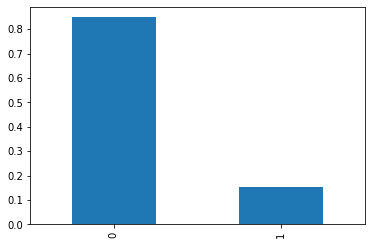

In [37]:
#normalize gives u proportion
df['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')

In [38]:
#display only features that are missing
# df.isnull().sum()
ms=df.isnull().sum()
ms[ms>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

6.214948349534676

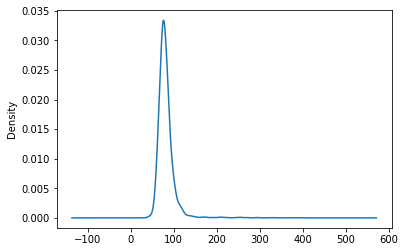

In [39]:
#befor imputation
df['glucose'].plot(kind='kde')
df['glucose'].skew()

In [40]:
# #aftr imputation
# df['glucose']=df['glucose'].fillna(df['glucose'].median())
# df['glucose'].plot(kind='kde')
# df['glucose'].skew()

In [41]:
df=df.fillna(method='ffill')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [43]:
y=df['TenYearCHD']

In [44]:
X=df.drop('TenYearCHD',axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [48]:
# Visualizing hence we can use entire data
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
# Create DOT data
dot_data = export_graphviz(dt, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [51]:
!pip install GraphViz

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
dt=DecisionTreeClassifier()

In [55]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
y_train_predict=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)
y_train_predict
y_train_prob
y_train_prob[:,1]
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_predict))
# Train data is overfitting and hence it is not working as expected on test

Overall Accuracy -Train 1.0
Confusion matrix-Train 
 [[2490    0]
 [   0  478]]
AUC - Train 1.0


In [57]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_pred))

Overall Accuracy -Test 1.0
Confusion matrix-Test 
 [[1106    0]
 [   0  166]]
AUC - Test 1.0


In [58]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)

Text(0, 0.5, 'TPR')

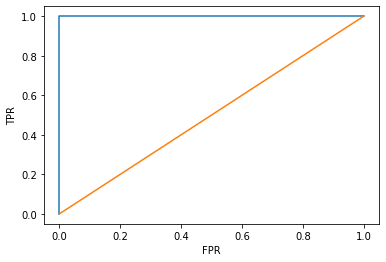

In [59]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


# Hyperparameter tuning

In [60]:
# 1)Grid Search
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [61]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
params={'max_depth':[2,3,4,5,6],
       'min_samples_leaf':[1,2,3,4,5,6,7],
       'min_samples_split':[2,3,4,5,6,7,8,9,10],
       'criterion':['gini','entropy']}
gsearch=GridSearchCV(dtc,param_grid=params,cv=3,scoring='roc_auc')


In [62]:
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [63]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [64]:
gsearchs=pd.DataFrame(gsearch.cv_results_)


In [65]:
gsearchs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006655,0.001288,0.003299,0.000462,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414
1,0.006344,0.000491,0.002977,0.000024,gini,2,1,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414
2,0.007331,0.000482,0.003316,0.000934,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414
3,0.005651,0.000474,0.003658,0.000474,gini,2,1,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414
4,0.006297,0.001252,0.003325,0.001245,gini,2,1,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414


In [66]:
dt=DecisionTreeClassifier(**gsearch.best_params_)
dt.fit(X,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
y_train_predict=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)
y_train_predict
y_train_prob
y_train_prob[:,1]
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_predict))
# Train data is overfitting and hence it is not working as exp

Overall Accuracy -Train 0.8463611859838275
Confusion matrix-Train 
 [[2476   14]
 [ 442   36]]
AUC - Train 0.5348456587857707


In [68]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_pred))

Overall Accuracy -Test 0.8734276729559748
Confusion matrix-Test 
 [[1102    4]
 [ 157    9]]
AUC - Test 0.5253001154709254


In [69]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)

Text(0, 0.5, 'TPR')

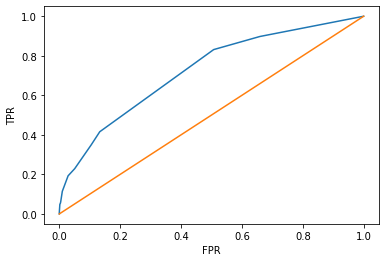

In [70]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


In [71]:
# Hyperparameter Tuning using Randomized Search

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={
    'max_depth':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,20),
    'min_samples_split':sp_randint(2,40),
    'criterion':['gini','entropy']
}
rsearch=RandomizedSearchCV(dtc,param_distributions=params,cv=3,scoring='roc_auc',n_iter=200)

In [73]:
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [74]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 16}

In [75]:
r=pd.DataFrame(rsearch.cv_results_).head(2)

In [76]:
r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012632,0.000470,0.002328,4.700779e-04,entropy,8,16,11,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.627090,0.626747,0.634181,0.629339,0.003426,97
1,0.016953,0.000814,0.001996,2.247832e-07,entropy,19,7,29,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.585158,0.589331,0.604368,0.592952,0.008250,185


In [77]:
dt=DecisionTreeClassifier(**rsearch.best_params_)

In [78]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
y_train_predict=dt.predict(X_train)
y_train_prob=dt.predict_proba(X_train)
y_train_predict
y_train_prob
y_train_prob[:,1]
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_predict))
# Train data is overfitting and hence it is not working as expected on test

Overall Accuracy -Train 0.8463611859838275
Confusion matrix-Train 
 [[2476   14]
 [ 442   36]]
AUC - Train 0.5348456587857707


In [80]:
y_test_pred=dt.predict(X_test)
y_test_prob=dt.predict_proba(X_test)[:,1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_pred))

Overall Accuracy -Test 0.8734276729559748
Confusion matrix-Test 
 [[1102    4]
 [ 157    9]]
AUC - Test 0.5253001154709254


In [81]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)

Text(0, 0.5, 'TPR')

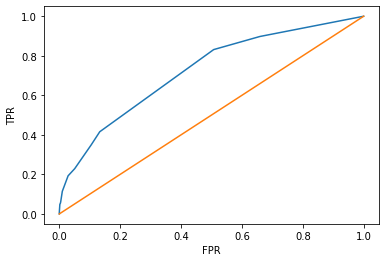

In [82]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
